In [11]:
%matplotlib inline
from matplotlib import pylab as plt

from metatlas import metatlas_objects as metob
# Group
# from metatlas import Atlas
# from metatlas import queryDatabase
# metatlas_objects
# from metatlas import h5_query

# import glob, os

# import numpy as np

# from bokeh.plotting import *
# output_notebook()

In [13]:
myMethod = metob.Method()
myMethod.edit()

In [10]:
queryDatabase('Atlas',user='curt',description='an atlas')

[{'compounds_ids': [],
  'created': '2015-09-11T21:12:11',
  'created_by': u'bpb',
  'description': u'No description',
  'last_modified': '2015-09-11T21:13:51',
  'modified_by': u'bpb',
  'name': u'Demo Atlas',
  'prev_unique_id': u'c6be27cdec4740fb8daf5e91ddad02ae',
  'unique_id': u'4aa04a7587f34061a48d2d6fa75d9c85'}]

In [21]:
queryDatabase('group',modified_by='silvest',name='My cool title')

[{'created': '2015-09-11T02:12:45',
  'created_by': u'silvest',
  'description': u'No description',
  'items': [],
  'last_modified': '2015-09-11T02:14:00',
  'modified_by': u'silvest',
  'name': u'My cool title',
  'prev_unique_id': u'0cc67cc77687411ea8e5856e6a57dc03',
  'unique_id': u'66fc5a23e0c84987a1a9660a5e6889e0'}]

In [8]:
myAtlas

{'compounds_ids': [],
 'created': '2015-09-11T21:12:11',
 'created_by': u'bpb',
 'description': u'No description',
 'last_modified': '2015-09-11T21:13:51',
 'modified_by': u'bpb',
 'name': u'Demo Atlas',
 'prev_unique_id': u'c6be27cdec4740fb8daf5e91ddad02ae',
 'unique_id': u'4aa04a7587f34061a48d2d6fa75d9c85'}

In [5]:
myAtlas = Atlas()
myAtlas.edit()

In [7]:
myAtlas.store()

In [3]:
myGroup = Group()
myGroup.edit()

<h1>Select an experiment</h1>

In [2]:
myExperiment = metatlas_objects.get_experiment(name = 'Test_20150722')
len(myExperiment.atlases[-1].compounds)

54

In [3]:
myExperiment = metatlas_objects.get_experiment(name = 'Test_20150722')

print "Compounds:"
for i,c in enumerate(myExperiment.atlases[-1].compounds):
    print i,c.name,c.mz, c.rt_peak, c.pubchem_id
print ""

print "File Data:"
print len(myExperiment.finfos)
print myExperiment.finfos[0].hdf_file
print myExperiment.finfos[0].group
print myExperiment.finfos[0].polarity

Compounds:
0 DL-Leucine 132.1019056 7.43 857.0
1 DL-Isoleucine 132.1019056 7.75 791.0
2 Leucyl-leucine 245.185969 4.4 94244.0
3 DL-Proline 116.070605 8.66 614.0
4 Pyridoxine 170.081169 2.67 1054.0
5 Betaine 118.086255 6.52 247.0
6 Leu-Val 231.170319 5.53 352038.0
7 Propionyl Carnitine 235.165231 6.5 107738.0
8 Creatinine 114.066188 4.67 588.0
9 Phenylalanine 166.086255 7.54 6140.0
10 Leu-Pro 229.154669 7.38 80817.0
11 Val-Pro 215.139018 7.94 9837272.0
12 Pro-Leu 229.154669 5.97 444109.0
13 Nicotinic acid 124.039304 5.89 938.0
14 Valine 118.086255 8.93 6287.0
15 L-Glutamic Acid 148.060434 13.92 33032.0
16 Leu-Met 263.14239 6.89 118276.0
17 Tyrosine 182.081169 10.03 6057.0
18 Methionine 150.058326 8.59 6137.0
19 Adenosine 268.1040304 4.41 60961.0
20 Histidine 156.0766 14.18 6274.0
21 Tryptophan 205.0971541 8.52 6305.0
22 Adenine 136.0617716 4.33 190.0
23 Dimethylglycine 104.070605 11.94 673.0
24 Threonine 120.0656 11.53 6288.0
25 Alanine 90.0555 11.22 5950.0
26 Serine 106.0501 12.79 5951

In [4]:
# Define a function to help us get 
# MS1 EIC data
# get spectrum near RT-peak
# Get MSMS data for each compound
# get MS1 data and summarize the datapoints
# get heatmap
def get_data_for_a_compound(compound,what_to_get,h5file,polarity):
    """
    A helper function to query the various metatlas data selection 
    commands for a compound defined in an experimental atlas.

    Parameters
    ----------
    compound : a MetAtlas Object for a Compound Class
        this contains the m/z and retention time constraints to select data
    what_to_get : a list of strings
        this contains one or more of [ 'ms1_summary', 'eic', '2dhist', 'msms' ]
    h5_file : str
        Path to input_file
    polarity : int
        [0 or 1] for negative or positive ionzation
    
    Returns
    -------
    """
    #TODO : polarity should be handled in the experiment and not a loose parameter
    import numpy as np
    import metatlas
    import tables
    
    #get a pointer to the hdf5 file
    fid = tables.open_file(h5file)

    #parse varaiables from the metatlas compound object
    name = compound.name
    formula = compound.formula
    adducts = compound.adducts
    mz_theor = compound.mz
    ppm_uncertainty = compound.mz_threshold
    ms_level = 1
    rt_min = compound.rt_min
    rt_max = compound.rt_max
    mz_min = mz_theor - mz_theor * ppm_uncertainty / 1e6
    mz_max = mz_theor + mz_theor * ppm_uncertainty / 1e6
    
    return_data = {}
    return_data['compound'] = {}
    return_data['compound']['name'] = name
    return_data['compound']['formula'] = formula
    return_data['compound']['mz'] = mz_theor
    return_data['compound']['adducts'] = adducts
    
    if 'ms1_summary' in what_to_get:
        #Get Summary Data
        
        #First get MS1 Raw Data
        ms_level=1
        ms1_data = metatlas.get_data(fid, 
                                 ms_level,
                                 polarity,
                                 min_mz=mz_min,
                                 max_mz=mz_max,
                                 min_rt=rt_min,
                                 max_rt=rt_max)
        
        return_data['ms1_summary'] = {}
        return_data['ms1_summary']['mz_centroid'] = np.sum(np.multiply(ms1_data['i'],ms1_data['mz'])) / np.sum(ms1_data['i'])
        return_data['ms1_summary']['rt_centroid'] = np.sum(np.multiply(ms1_data['i'],ms1_data['rt'])) / np.sum(ms1_data['i'])
        idx = np.argmax(ms1_data['i'])
        return_data['ms1_summary']['mz_max'] = ms1_data['mz'][idx]
        return_data['ms1_summary']['rt_max'] = ms1_data['rt'][idx]        
        return_data['ms1_summary']['peak_height'] = ms1_data['i'][idx]
        return_data['ms1_summary']['peak_area'] = np.sum(ms1_data['i'])
    
    if 'eic' in what_to_get:
        #Get Extracted Ion Chromatogram
        # TODO : If a person calls for summary, then they will already have the MS1 raw data
        rt,intensity = metatlas.get_XIC(fid, 
                                        mz_min, 
                                        mz_max,
                                        ms_level,
                                        polarity)
        return_data['eic'] = {}
        return_data['eic']['rt'] = rt
        return_data['eic']['intensity'] = intensity
    
    if '2dhist' in what_to_get:
        #Get 2D histogram of intensity values in m/z and retention time
        mzEdges = np.logspace(np.log10(100),np.log10(1000),10000)
#         mzEdges = np.linspace(mz_theor - 3, mz_theor + 30,100) #TODO : number of mz bins should be an optional parameter
        rtEdges = np.linspace(rt_min,rt_max,100) #TODO : number of rt bins should be an optional parameter. When not provided, it shoulddefauly to unique bins
        ms_level = 1 #TODO : ms_level should be a parameter
        return_data['2dhist'] = {}
        return_data['2dhist'] = metatlas.get_heatmap(fid,mzEdges,rtEdges,ms_level,polarity)
    
    if 'msms' in what_to_get:
        #Get Fragmentation Data
        ms_level=2
        fragmentation_data = metatlas.get_data(fid, 
                                 ms_level,
                                 polarity,
                                 min_mz=0,
                                 max_mz=mz_theor+10,#TODO : this needs to be a parameter
                                 min_rt=rt_min,
                                 max_rt=rt_max,
                                 min_precursor_MZ=mz_min,
                                 max_precursor_MZ=mz_max)
    #                     min_precursor_intensity=0, #TODO : this needs to be a parameter
    #                     max_precursor_intensity=0,#TODO : this needs to be a parameter
    #                     min_collision_energy=0,#TODO : this needs to be a parameter
    #                     max_collision_energy=0)#TODO : this needs to be a parameter
        return_data['msms'] = fragmentation_data

    return return_data

In [11]:
data = get_data_for_a_compound(myExperiment.atlases[-1].compounds[0],
                           ['ms1_summary','2dhist','msms','eic'],
                           myExperiment.finfos[0].hdf_file,
                           myExperiment.finfos[0].polarity)

Querying: (rt >= 6.93) & (rt <= 7.93) & (mz >= 132.100584581) & (mz <= 132.103226619) from ms1_pos
Query complete
Querying: (mz >= 132.100584581) & (mz <= 132.103226619) from ms1_pos
Query complete
Querying: (rt >= 6.93) & (rt <= 7.93) & (mz >= 0) & (mz <= 142.1019056) & (precursor_MZ >= 132.100584581) & (precursor_MZ <= 132.103226619) from ms2_pos
Query complete


In [98]:
# # print data['2dhist']
# N = 20
# m = len(data['2dhist']['rt_bins'])
# n = len(data['2dhist']['mz_bins'])
# z = data['2dhist']['arr'][:]
# z = z / np.amax(z)
# img = np.empty((m,n), dtype=np.uint32)
# view = img.view(dtype=np.uint8).reshape((m, n, 4))
# for i in range(m):
#     for j in range(n):
#         view[i, j, 0] = int(z[i,j] * 255)#255#z[i,j] * 255
#         view[i, j, 1] = int(z[i,j] * 255)
#         view[i, j, 2] = int(z[i,j] * 255)
#         view[i, j, 3] = 255

# # output_file("image_rgba.html", title="image_rgba.py example")

# minx = 6 #np.amin(data['2dhist']['rt_bins'])
# maxx = 7 #np.amax(data['2dhist']['rt_bins'])

# miny = 100 #np.amin(data['2dhist']['mz_bins'])
# maxy = 200 #np.amax(data['2dhist']['mz_bins'])


# p = figure(x_range=[minx, maxx],
#            y_range=[miny, maxy])

# p.image_rgba(image=[img], 
#              x=[minx], y=[miny], 
#              dw=[maxx], dh=[maxy])

# show(p)  # open a browser

In [ ]:
datamat['Adenine'][data,data,data,data]

In [5]:
datamat = []
for i in range(27):
    c = myExperiment.atlases[-1].compounds[i]
    datarow = []
    for j in range(3): # TODO : Because I loaded my files twice, I have 2 times the finfos
        print i,j, myExperiment.finfos[j].hdf_file, c.name
        try:
            data = get_data_for_a_compound(c,
                                       ['msms','2dhist' ,'eic', 'ms1_summary']
                                       myExperiment.finfos[j].hdf_file,
                                       myExperiment.finfos[j].polarity)
            datarow.append(data)
        except: # TODO : A value error is thrown for certain files for compound #2.  There should be a good way to deal with this
            datarow.append('')
    datamat.append(datarow)


0 0 /global/homes/b/bpb/ExoMetabolomic_Example_Data/MEDIA-1.h5 DL-Leucine
Querying: (rt >= 6.93) & (rt <= 7.93) & (mz >= 0) & (mz <= 142.1019056) & (precursor_MZ >= 132.100584581) & (precursor_MZ <= 132.103226619) from ms2_pos
Query complete
0 1 /global/homes/b/bpb/ExoMetabolomic_Example_Data/MEDIA-2.h5 DL-Leucine
Querying: (rt >= 6.93) & (rt <= 7.93) & (mz >= 0) & (mz <= 142.1019056) & (precursor_MZ >= 132.100584581) & (precursor_MZ <= 132.103226619) from ms2_pos
Query complete
0 2 /global/homes/b/bpb/ExoMetabolomic_Example_Data/MEDIA-3.h5 DL-Leucine
Querying: (rt >= 6.93) & (rt <= 7.93) & (mz >= 0) & (mz <= 142.1019056) & (precursor_MZ >= 132.100584581) & (precursor_MZ <= 132.103226619) from ms2_pos
Query complete
1 0 /global/homes/b/bpb/ExoMetabolomic_Example_Data/MEDIA-1.h5 DL-Isoleucine
Querying: (rt >= 7.25) & (rt <= 8.25) & (mz >= 0) & (mz <= 142.1019056) & (precursor_MZ >= 132.100584581) & (precursor_MZ <= 132.103226619) from ms2_pos
Query complete
1 1 /global/homes/b/bpb/ExoMe

In [6]:
print len(datamat)
print len(datamat[0])
# print datamat[15][15].keys()

flist = ['msms','compound']
import pickle
data = {}
for i,d in enumerate(datamat):
    try:
        print i,d[0].keys()
        data[d[0]['compound']['name']] = d[0]['msms']
    except:
        pass

        
# with open('savedata.pickle', 'wb') as handle:
#     pickle.dump(data, handle)

# with open('filename.pickle', 'rb') as handle:
#   datamat = pickle.load(handle)

27
3
0 ['msms', 'compound']
1 ['msms', 'compound']
2 ['msms', 'compound']
3 ['msms', 'compound']
4 ['msms', 'compound']
5 ['msms', 'compound']
6 ['msms', 'compound']
7 ['msms', 'compound']
8 ['msms', 'compound']
9 ['msms', 'compound']
10 ['msms', 'compound']
11 ['msms', 'compound']
12 ['msms', 'compound']
13 ['msms', 'compound']
14 ['msms', 'compound']
15 ['msms', 'compound']
16 17 ['msms', 'compound']
18 ['msms', 'compound']
19 20 ['msms', 'compound']
21 ['msms', 'compound']
22 ['msms', 'compound']
23 ['msms', 'compound']
24 ['msms', 'compound']
25 26 ['msms', 'compound']


In [8]:
# create a new plot with a title and axis labels

# x = data['msms']['mz']
# y0 = np.zeros(data['msms']['i'].shape)
# y =  data['msms']['i']
key = 'Adenine'
x = data[key]['mz']
y0 = np.zeros(data[key]['i'].shape)
y =  data[key]['i']

p1 = figure(title='MS/MS data for %s'%key, x_axis_label='m/z', y_axis_label='Intensity',plot_width=800, plot_height=400)
p1.segment(x, y0, x, y, line_width=2, line_color="black", )
# p1.circle(x, y, size=5, fill_color="orange", line_color="green", line_width=2, )
show(vplot(p1))

In [37]:
# create a new plot with a title and axis labels

# x = data['msms']['mz']
# y0 = np.zeros(data['msms']['i'].shape)
# y =  data['msms']['i']
metIdx = 21
fileIdx = 0
x = datamat[metIdx][fileIdx]['msms']['mz']
y0 = np.zeros(datamat[metIdx][fileIdx]['msms']['i'].shape)
y =  datamat[metIdx][fileIdx]['msms']['i']

p1 = figure(title='MS/MS data for %s'%datamat[metIdx][fileIdx]['compound']['name'], x_axis_label='m/z', y_axis_label='Intensity',plot_width=800, plot_height=400)
p1.segment(x, y0, x, y, line_width=2, line_color="black", )
# p1.circle(x, y, size=5, fill_color="orange", line_color="green", line_width=2, )
show(vplot(p1))

In [19]:
print datamat[10][0]['msms']

{'rt': array([ 6.88417339,  6.88417339,  6.88417339,  6.88417339,  6.88417339,
        6.88417339,  6.88417339,  6.88417339,  6.88417339,  6.88417339,
        6.88417339,  6.88417339,  6.88417339,  6.88417339,  6.88417339,
        6.88417339,  6.88417339,  6.88417339,  6.88417339,  7.06354856,
        7.06354856,  7.06354856,  7.06354856,  7.06354856,  7.06354856,
        7.06354856,  7.06354856,  7.06354856,  7.06354856,  7.06354856,
        7.06354856,  7.06354856,  7.06354856,  7.06354856,  7.06354856,
        7.06354856,  7.06354856,  7.06354856,  7.06354856,  7.06354856,
        7.06354856,  7.06354856,  7.06354856,  7.06354856,  7.06354856,
        7.06354856,  7.06354856,  7.06354856,  7.06354856,  7.06354856,
        7.06354856,  7.06354856,  7.23624659,  7.23624659,  7.23624659,
        7.23624659,  7.23624659,  7.23624659,  7.23624659,  7.23624659,
        7.23624659,  7.23624659,  7.23624659,  7.23624659,  7.23624659,
        7.23624659,  7.23624659,  7.23624659,  7.23624659

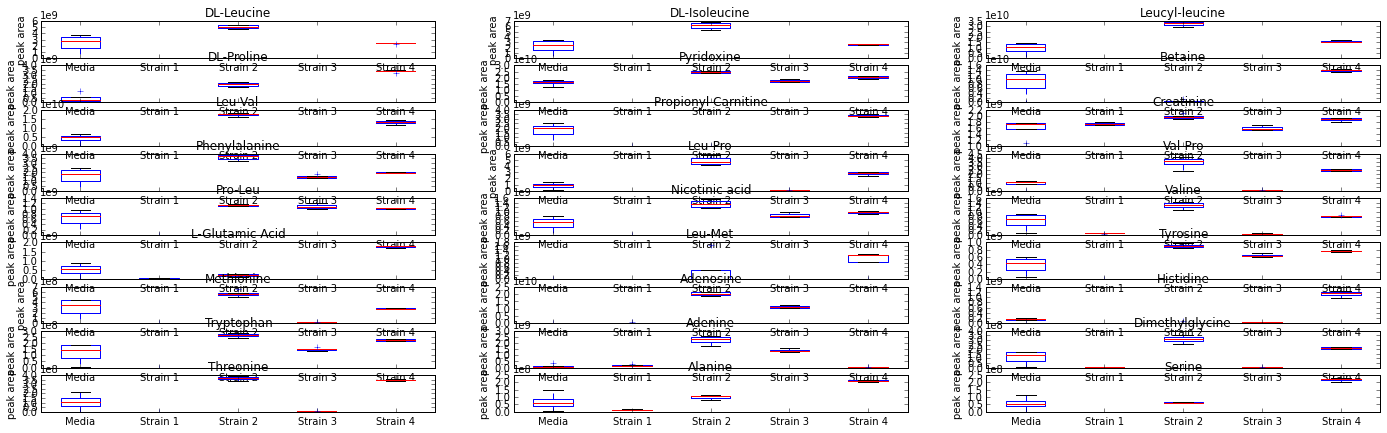

In [19]:
# for datarow in datamat:
from itertools import groupby
plt.figure(num=None, figsize=(24, 7), dpi=80, facecolor='w', edgecolor='k')

# fig = plt.figure(figsize=(30,5))
for j,mycompound in enumerate(myExperiment.atlases[3].compounds):

    datarow = datamat[j]
    myVals = []
    for i,myFile in enumerate(datarow):
        try:
            myVals.append((myExperiment.finfos[i].group, myFile['peak_area']))
        except:
            myVals.append((myExperiment.finfos[i].group, 0))
    myVals = sorted(myVals, key=lambda x: x[0]) 

    data_to_plot = []
    groupName = []
    for key, group in groupby(myVals, lambda x: x[0]):
        L = list(zip(*group)[1])
        data_to_plot.append(L)
        groupName.append(key)
    plt.subplot(9,3,j+1)

    bp = plt.boxplot(data_to_plot)
    ax = plt.gca()
    ax.set_xticklabels(groupName)
    ax.set_title(mycompound.name)
    ax.set_ylabel('peak area')
plt.show()
